In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 1- Description of dataset through commands of summary
 
 5- Use 5 different methods of pandas on features

LOADING DATASET


In [3]:
df=  pd.read_csv("large-scale-industries-csv.csv") 

In [4]:
df.head() #check first five rows

,Month-year,CPI,Interest Rates,Exchange Rates,Product,Unit of Quantity,Production
0,Jan-13,8.1,10.61,110.7072,Petroleum,`000' Litres,NaN
1,Feb-13,7.4,10.53,111.7072,Petroleum,`000' Litres,"953,078"
2,Mar-13,6.6,10.46,112.7072,Petroleum,`000' Litres,"1,093,134"
3,Apr-13,5.8,10.51,113.7072,Petroleum,`000' Litres,"1,096,820"
4,May-13,5.1,10.65,114.7072,Petroleum,`000' Litres,"997,959"


In [5]:
df.tail() # check last five rows 

,Month-year,CPI,Interest Rates,Exchange Rates,Product,Unit of Quantity,Production
7723,Aug-19,11.6,13.09,189.7072,Bicycles,Nos.,"15,395"
7724,Sep-19,12.6,13.51,190.7072,Bicycles,Nos.,"15,394"
7725,Oct-19,11.1,13.67,191.7072,Bicycles,Nos.,"15,396"
7726,Nov-19,12.3,13.84,192.7072,Bicycles,Nos.,"15,500"
7727,Dec-19,12.4,13.84,193.7072,Bicycles,Nos.,"15,411"


2- Randomly miss 3 to 4 columns values almost 25 %

In [ ]:
df.isnull().sum() # check for null values, we do not want null values in the data, the data needs to be free from null values before creating models

Month-year             0
CPI                  182
Interest Rates      1298
Exchange Rates       215
Product                0
Unit of Quantity       0
Production            98
dtype: int64

In [ ]:
df.info() # check the info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month-year        7728 non-null   object 
 1   CPI               7546 non-null   float64
 2   Interest Rates    6430 non-null   float64
 3   Exchange Rates    7513 non-null   float64
 4   Product           7728 non-null   object 
 5   Unit of Quantity  7728 non-null   object 
 6   Production        7630 non-null   object 
dtypes: float64(3), object(4)
memory usage: 422.8+ KB


3- Explore data through various plotting to check missing values and noisy data


In [ ]:
import missingno as msno
%matplotlib inline

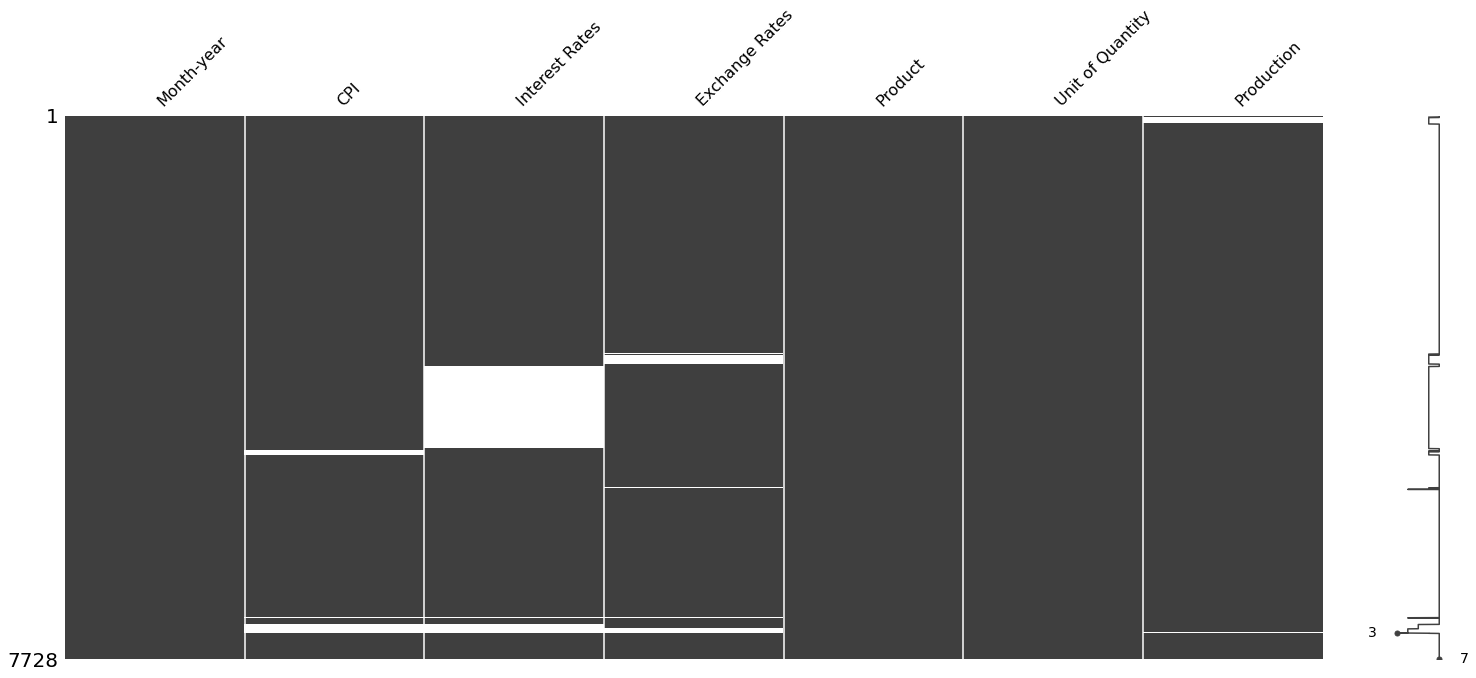

In [ ]:
msno.matrix(df)

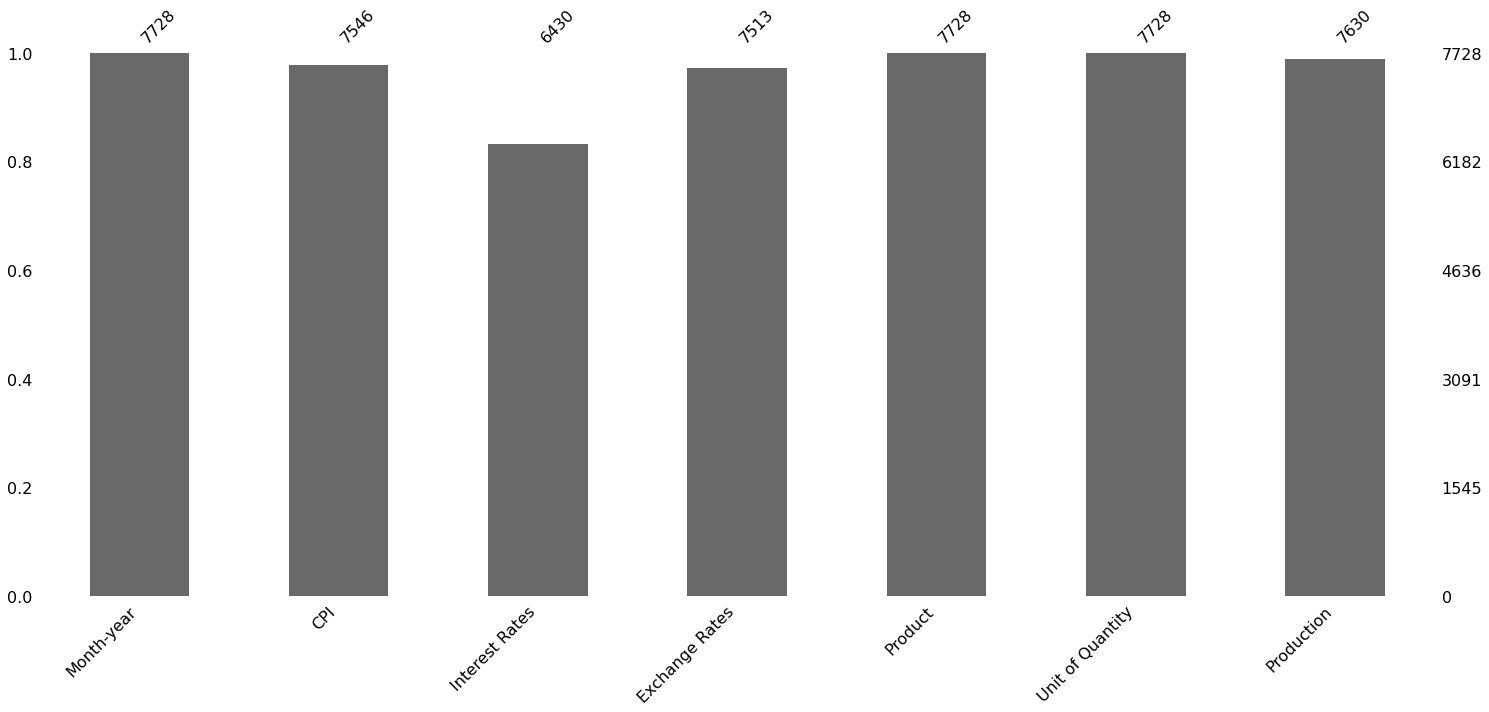

In [ ]:
msno.bar(df)

6- Use fill method against the missing value with some imputation

In [ ]:
m1 = df["CPI"].mean()
m2 = df["Interest Rates"].mean()
m3 = df["Exchange Rates"].mean()


In [ ]:
df['CPI'].fillna(m1,inplace = True)
df['Interest Rates'].fillna(m2,inplace = True)
df['Exchange Rates'].fillna(m3,inplace = True)
#df['Production'].fillna(m4,inplace = True)

In [ ]:
df.isna().sum() # check for null values, we do not want null values in the data, the data needs to be free from null values before creating models

Month-year           0
CPI                  0
Interest Rates       0
Exchange Rates       0
Product              0
Unit of Quantity     0
Production          98
dtype: int64

WE WILL LABEL ENCODE OUR ALL STRING DATA

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Month-year'.
df['Month-year']= label_encoder.fit_transform(df['Month-year'])
  
df['Month-year'].unique()

array([28, 21, 49,  0, 56, 42, 35,  7, 77, 70, 63, 14, 29, 22, 50,  1, 57,
       43, 36,  8, 78, 71, 64, 15, 30, 23, 51,  2, 58, 44, 37,  9, 79, 72,
       65, 16, 31, 24, 52,  3, 59, 45, 38, 10, 80, 73, 66, 17, 32, 25, 53,
        4, 60, 46, 39, 11, 81, 74, 67, 18, 33, 26, 54,  5, 61, 47, 40, 12,
       82, 75, 68, 19, 34, 27, 55,  6, 62, 48, 41, 13, 83, 76, 69, 20])

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Product'.
df['Product']= label_encoder.fit_transform(df['Product'])
  
df['Product'].unique()

array([59, 36, 40, 50, 32, 19, 26, 46, 38, 74, 43, 60, 77, 11, 14, 13, 39,
       31, 67, 55, 58,  9, 71,  6, 53, 61, 28,  7, 62,  2, 29, 84, 85,  4,
       35, 42, 49, 87, 12, 82, 89, 75, 72, 37, 45, 90, 91, 41, 73, 25, 63,
       81, 44,  5, 34, 54, 27, 83, 70, 57, 56, 33, 79, 10, 64, 47, 16, 15,
       52, 51, 48, 30, 68, 18,  8, 78, 88, 65,  3, 69, 66, 17,  0, 20, 21,
       23, 22, 80, 24, 86, 76,  1])

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Unit of Quantity'.
df['Unit of Quantity']= label_encoder.fit_transform(df['Unit of Quantity'])
  
df['Unit of Quantity'].unique()

array([103, 102,  97,   1,  11,  22,  33,  44,  55,  66,  77,  88,  93,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  89,  90,  91,  92,  95,  99,   9,  10,
       100,   0,   8,   6,   7,   4,   3,   5,   2,  94,  98,  96, 101])

**Here we have to do label encoding because 0ur Production column has ',' commas. therfore mathematical operations can not be performed on it.**



---





In [ ]:
df['Production'].unique()

array([nan, '953,078', '1,093,134', ..., '15,396', '15,500', '15,411'],
      dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Production'.
df['Production']= label_encoder.fit_transform(df['Production'])
  
df['Production'].unique()

array([5714, 5645,   52, ..., 1063, 1073, 1064])

In [ ]:
m4 = df["Production"].mean()

In [ ]:
df['Production'].fillna(m4,inplace = True)

In [ ]:
df.isna().sum()

Month-year          0
CPI                 0
Interest Rates      0
Exchange Rates      0
Product             0
Unit of Quantity    0
Production          0
dtype: int64

**4**-  Use 3 to 4 methods of numpy

In [ ]:
df1 = pd.DataFrame(columns=['abc','a','log_target'])

In [ ]:
df1["abc"] = np.where((df["CPI"] > 10)& (df["Interest Rates"] > 10), 1, 0)
df1["abc"]

0       0
1       0
2       0
3       0
4       0
       ..
7723    1
7724    1
7725    1
7726    1
7727    1
Name: abc, Length: 7728, dtype: int64

In [ ]:
conditions = [
  (df["CPI"] >= 10) & (df["Exchange Rates"] == 210),
  (df["CPI"] >= 10) & (df["Exchange Rates"] == 116)
]
values = [1, 2]
df1["a"] = np.select(conditions, values, default=0)
df1["a"]

0       0
1       0
2       0
3       0
4       0
       ..
7723    0
7724    0
7725    0
7726    0
7727    0
Name: a, Length: 7728, dtype: int64

In [ ]:
df1["log_target"] = np.log(df["CPI"])
df1["log_target"] 

0       2.091864
1       2.001480
2       1.887070
3       1.757858
4       1.629241
          ...   
7723    2.451005
7724    2.533697
7725    2.406945
7726    2.509599
7727    2.517696
Name: log_target, Length: 7728, dtype: float64

7- Use 5 different plotting through matplotlib on various features

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

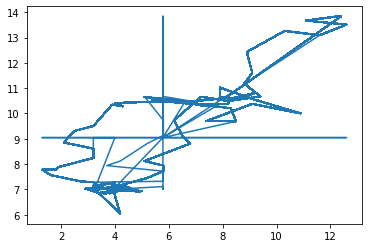

In [ ]:
plt.plot(df["CPI"], df["Interest Rates"])

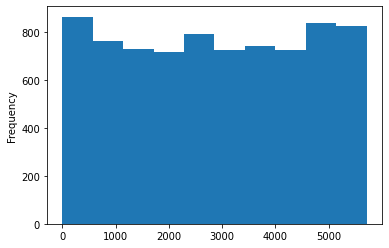

In [ ]:
df["Production"].plot(kind = 'hist')

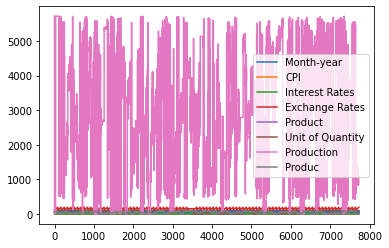

In [ ]:
lines = df.plot.line()

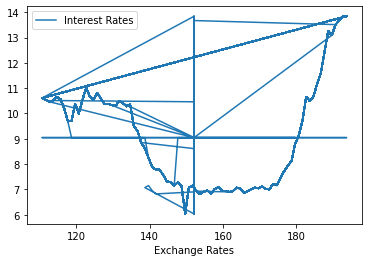

In [ ]:
lines = df.plot.line(x='Exchange Rates', y='Interest Rates')

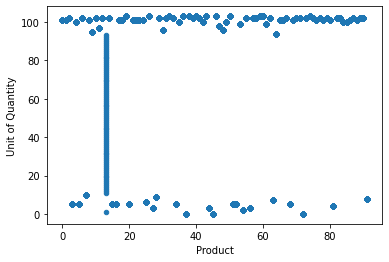

In [ ]:
df.plot(kind = 'scatter', x = 'Product', y = 'Unit of Quantity')

plt.show()

8- Use 5 different plotting through Seaborn on various features 

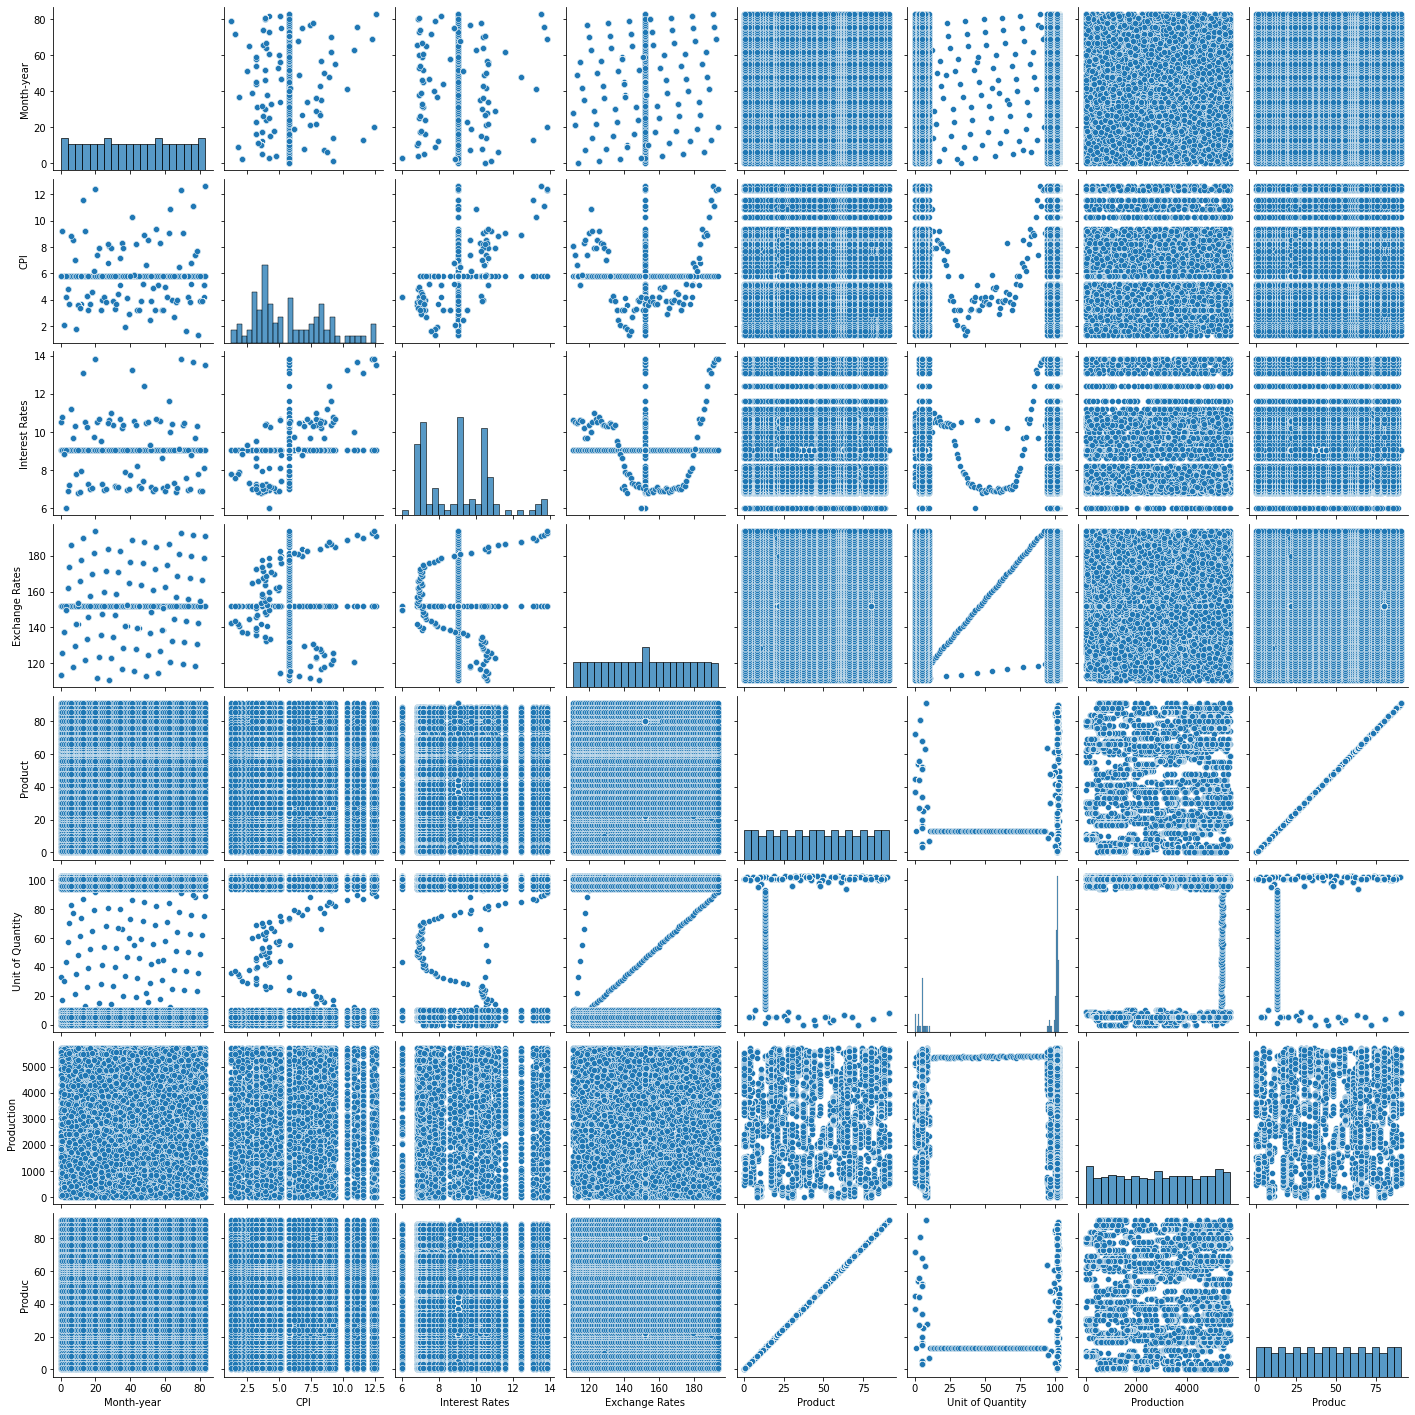

In [ ]:
sns.pairplot(df)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

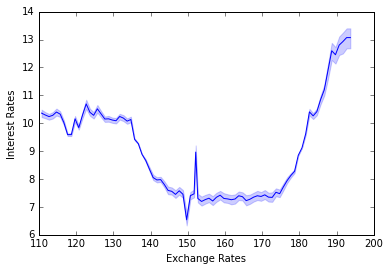

In [ ]:
ax = sns.lineplot(x = 'Exchange Rates', y = 'Interest Rates', data = df)

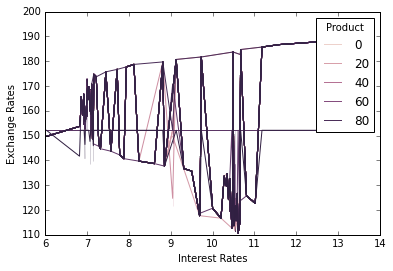

In [ ]:
ax = sns.lineplot(x = 'Interest Rates', y = 'Exchange Rates', data = df, hue = 'Product')

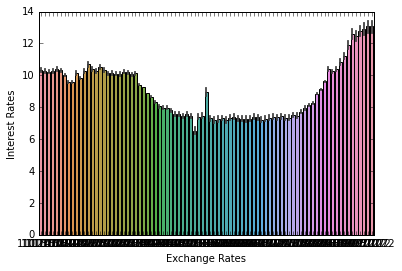

In [ ]:
ax = sns.barplot(x = 'Exchange Rates', y = 'Interest Rates', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


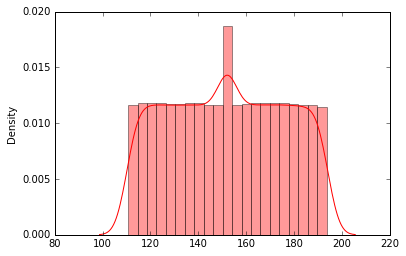

In [ ]:
a = df['Exchange Rates'].values
sns.distplot(a, color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


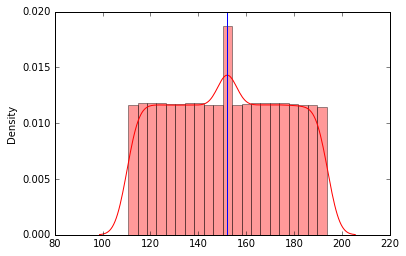

In [ ]:
mean = df['Exchange Rates'].mean()
sns.distplot(a, color = 'red')
plt.axvline(mean,0,1,color = 'blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


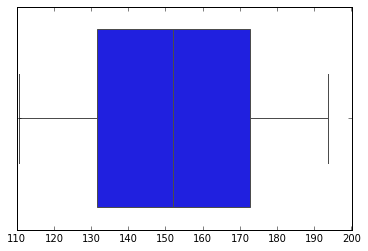

In [ ]:
sns.boxplot(a)

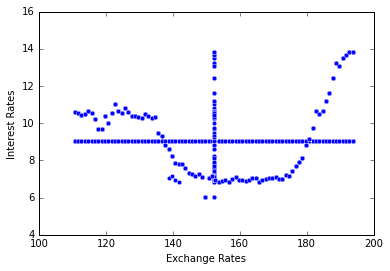

In [ ]:
ax = sns.scatterplot(x = 'Exchange Rates', y = 'Interest Rates', data = df)

9- Apply 08 different machine learning models in
case of regression apply (linear, multiple regression, decision tree regressor, random forest
regressor, SVM regressor) 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Month-year', 'CPI', 'Interest Rates', 'Exchange Rates', 'Product',
       'Unit of Quantity', 'Production'],
      dtype='object')

In [ ]:
df.columns

Index(['Month-year', 'CPI', 'Interest Rates', 'Exchange Rates', 'Product',
       'Unit of Quantity', 'Production'],
      dtype='object')

In [ ]:
Y = df["Production"]

In [ ]:
X = df[['CPI', 'Interest Rates', 'Exchange Rates', 'Product']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30)

In [ ]:
x_train.shape, x_test.shape

((5409, 6), (2319, 6))

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train,y_train)

In [ ]:
reg.coef_  # These are our theta values

array([ 15.56268684, -31.35354827,   2.02370978,   0.27859882])

In [ ]:
reg.intercept_

2739.920639040384

In [ ]:
y_pred_train = reg.predict(x_train)

In [ ]:
print(y_pred_train)

[2812.5416504  2916.02905849 2906.61534236 ... 2874.98947651 2749.57055098
 2895.96994356]


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month-year        7728 non-null   int64  
 1   CPI               7728 non-null   float64
 2   Interest Rates    7728 non-null   float64
 3   Exchange Rates    7728 non-null   float64
 4   Product           7728 non-null   int64  
 5   Unit of Quantity  7728 non-null   int64  
 6   Production        7728 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 422.8 KB


In [ ]:
dt = DecisionTreeRegressor(random_state = 42)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
y_pred_dt

array([4390., 2398.,  696., ..., 1249., 3666., 3976.])

RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rfModel = rf.fit(x_train,y_train)

In [ ]:
y_pred_rf = rfModel.predict(x_test)

In [ ]:
y_pred_rf

array([4838.79, 2265.41,  804.18, ..., 1136.31, 3326.37, 3951.66])

***LassoLars***

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LassoLars(alpha=0.01, normalize=False)

In [ ]:
reg.fit(x_train,y_train)

LassoLars(alpha=0.01, normalize=False)

In [ ]:
reg.coef_

array([  1.49248267,  17.97932979, -42.71738332,   1.42087273,
         1.15081245,  -3.34269811])

In [ ]:
y_pred_train = reg.predict(x_train)

In [ ]:
print(y_pred_train)

[2831.23285077 2704.48877596 3296.16705356 ... 3077.47179424 2674.99499834
 2906.83902205]


In [ ]:
mean_squared_error(y_train,y_pred_train)

2861657.4455010304

In [ ]:
r2_score(y_train, y_pred_train)

0.00862209161268046

In [ ]:
y_pred_test = reg.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_test)

2915368.614023082

In [ ]:
r2_score(y_test, y_pred_test)

0.008038669224571526

***Bayesian Regression***

In [ ]:
from sklearn import linear_model


In [ ]:
clf = linear_model.BayesianRidge()

In [ ]:
clf.fit(x_train,y_train)

BayesianRidge()

In [ ]:
y_pred_train = clf.predict(x_train)

In [ ]:
clf.predict(x_train)

array([2803.83421498, 2731.12596928, 3177.67846143, ..., 3057.56533497,
       2717.79838572, 2877.24703907])

In [ ]:
mean_squared_error(y_train,y_pred_train)

2864385.8359235832

In [ ]:
r2_score(y_train, y_pred_train)

0.00767688204728445

In [ ]:
y_pred_test = reg.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_test)

2915368.614023082

In [ ]:
r2_score(y_test, y_pred_test)

0.008038669224571526

***ElasticNet***

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_features=2, random_state=0)

In [ ]:
regr = ElasticNet(random_state=0)

In [ ]:
regr.fit(x_train, y_train)

ElasticNet(random_state=0)

In [ ]:
print(regr.coef_)

[  1.48752183   9.91701299 -29.18053716   1.55008966   1.14126663
  -3.33849775]


In [ ]:
print(regr.intercept_)

2993.201569277393


In [ ]:
y_pred_train = regr.predict(x_train)

In [ ]:
print(regr.predict(x_train))

[2826.14214392 2700.16078391 3258.04820309 ... 3068.81355022 2676.90860689
 2898.89233223]


In [ ]:
mean_squared_error(y_train,y_pred_train)

2861905.834077962

In [ ]:
r2_score(y_train, y_pred_train)

0.008536041149773799

In [ ]:
y_pred_test = reg.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_test)

2915368.614023082

In [ ]:
r2_score(y_test, y_pred_test)

0.008038669224571526

Ridge regression

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.Ridge(alpha=.5)

In [ ]:
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [ ]:
reg.coef_


array([0.34545455, 0.34545455])

In [ ]:
reg.intercept_

0.13636363636363638

HUBER REGRESSION

In [ ]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

In [ ]:
huber = HuberRegressor().fit(x_train, y_train)

In [ ]:
huber.score(x_train, y_train)

0.008112339144510261

In [ ]:
y_pred_test = huber.predict(x_test)

In [ ]:
huber.coef_

array([  2.02969281,  25.85476033, -58.99601342,   2.13886052,
         1.20979289,  -3.8245781 ])

In [ ]:
huber.intercept_

3102.288103003126

WE WILL NOT SOLVE PART 10 AS WE HAVE REGRESSION PROBLEM!